In [115]:
'''
There will be three parts in presatation:
  *Introduction to dataset 
  *Run the code and explain the result
    ◇Get datasets
    ◇Datamining and visulization
  *Share learning process

Part I -- Introduction to dataset
1.1 Why
  *Curious
    ◇When I chatting with my friends one day, I realised since I came to USA, I never went to watch a 
     movie in the movie theater. I'm curious about box office now. 
  *Meaningful
    ◇Entertainment spendings reflect life quality of a country and obviously, movie is an important 
     part of emtertainment.
  *Interesting
    ◇One of most popular topics people talk about is movie and I also want to figure out wether there
     are some patters between pople's talk and box office.
  
  
1.2 Outline of the dataset I choose
1.2.1 The source
  *Movie
    ◇No ready-made dataset.
    ◇Extracted from html and exported to csv files
    ◇From this website: http://www.boxofficemojo.com
    
  *Twitter posts
    ◇From Twitter open API
    
  *Population & GDP 
    ◇Population dataset: from The World Bank--https://data.worldbank.org/indicator/SP.POP.TOTL
    ◇GDP dataset: from The World Bank--https://data.worldbank.org/indicator/NY.GDP.MKTP.CD
    
1.2.2 The Content
  *Movie: 
    ◇Box office of 10 countries from 2007 to 2016
    ◇Top 10 movies each year of USA from 1997 to 2016
  *Twitter: 
    ◇Number of twitter posts of top 10 movies each year of USA from 1998 to 2016
  *Population
    ◇worldwild population
  *GDP:
    ◇worldwild GDP
'''

"\nThere will be three parts in presatation:\n  *Introduction to dataset \n  *Run the code and explain the result\n    ◇Get datasets\n    ◇Datamining\n  *Share learning process\n\nPart I -- Introduction to dataset\n1.1 Why\n  *Curious\n    ◇When I chatting with my friends one day, I realised since I came to USA, I never went to watch a \n     movie in the movie theater. I'm curious about box office now. \n  *Meaningful\n    ◇Entertainment spendings reflect life quality of a country and obviously, movie is an important \n     part of emtertainment.\n  *Interesting\n    ◇One of most popular topics people talk about is movie and I also want to figure out wether there\n     are some patters between pople's talk and box office.\n  \n  \n1.2 Outline of the dataset I choose\n1.2.1 The source\n  *Movie\n    ◇No ready-made dataset.\n    ◇Extracted from html and exported to csv files\n    ◇From this website: http://www.boxofficemojo.com\n    \n  *Twitter posts\n    ◇From Twitter open API\n    \n

In [116]:
import os
import numpy as np
import pandas as pd
import sqlite3 as sql
import matplotlib
import matplotlib.pyplot as pp
%matplotlib inline
matplotlib.style.use('ggplot')

from matplotlib import cm

import plotly
import plotly.plotly as py
import plotly.graph_objs as go
py.sign_in('XiaoqianSun','AaodLhc0SqgHzU60QJm1')
plotly.offline.init_notebook_mode()

import csv

import requests
from bs4 import BeautifulSoup

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [117]:
'''
Part II -- Run the code and explain the result
2.1 Get datasets
2.1.1 Get box office of 10 countries from 2007 to 2016
  *Randomly choose 10 countries
  *Extract data from website of each country 
  *Write into CSV file at last
'''
Countries_List = ['United States',
                  'Australia',
                  'United Kingdom', 
                  'Mexico',
                  'Russian Federation',
                  'Germany',
                  'France',
                  'Japan',
                  'Italy',
                  'Finland']

In [118]:
#No.1--United States
links_us = ['http://www.boxofficemojo.com/yearly/chart/?yr=2007&view=releasedate&view2=domestic&sort=gross&order=DESC&&p=.htm',
    'http://www.boxofficemojo.com/yearly/chart/?yr=2008&view=releasedate&view2=domestic&sort=gross&order=DESC&&p=.htm',
    'http://www.boxofficemojo.com/yearly/chart/?yr=2009&view=releasedate&view2=domestic&sort=gross&order=DESC&&p=.htm',
    'http://www.boxofficemojo.com/yearly/chart/?yr=2010&view=releasedate&view2=domestic&sort=gross&order=DESC&&p=.htm',
    'http://www.boxofficemojo.com/yearly/chart/?yr=2011&view=releasedate&view2=domestic&sort=gross&order=DESC&&p=.htm',
    'http://www.boxofficemojo.com/yearly/chart/?yr=2012&view=releasedate&view2=domestic&sort=gross&order=DESC&&p=.htm',
    'http://www.boxofficemojo.com/yearly/chart/?yr=2013&view=releasedate&view2=domestic&sort=gross&order=DESC&&p=.htm',
    'http://www.boxofficemojo.com/yearly/chart/?yr=2014&view=releasedate&view2=domestic&sort=gross&order=DESC&&p=.htm',
    'http://www.boxofficemojo.com/yearly/chart/?yr=2015&view=releasedate&view2=domestic&sort=gross&order=DESC&&p=.htm',
    'http://www.boxofficemojo.com/yearly/chart/?yr=2016&view=releasedate&view2=domestic&sort=gross&order=DESC&&p=.htm']

Year = 2006
Country = 'United States'
Data_us = []

for link in links_us:
    Year = Year + 1
    r = requests.get(link)
    soup = BeautifulSoup(r.content, 'html.parser')
    g_data = soup.find_all('font',attrs={"size":"2"})

    items_list_us = []
    for item in g_data:
        items_list_us.append(item.text)
    
    Total_Index_us = items_list_us.index('Totals:')+1
    Total_Gross = items_list_us[Total_Index_us]
    Total_Gross = Total_Gross.replace("$", "")
    Total_Gross = int(Total_Gross.replace(',',''))
    Data_us.append((Country, Year, Total_Gross))
Data_us

[('United States', 2007, 9690698475),
 ('United States', 2008, 9698009486),
 ('United States', 2009, 10821223109),
 ('United States', 2010, 10212038221),
 ('United States', 2011, 10113778430),
 ('United States', 2012, 10959569029),
 ('United States', 2013, 10955903188),
 ('United States', 2014, 10435971319),
 ('United States', 2015, 11098722111),
 ('United States', 2016, 11370143739)]

In [119]:
#No.2--Australia

#get the links dictionary of a certain country's 2007~2016 movie link (to count the total)
#get the links of each year
link_index_1_list_aus = []
for i in [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]:
    link_index_1_aus = 'http://www.boxofficemojo.com/intl/australia/yearly/?yr='+str(i)+'&p=.htm'
    i = i+1
    link_index_1_list_aus.append(link_index_1_aus)
link_index_1_list_aus

#get the links of index links
link_index_2_list_aus = []
for m in [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]:
    link_index_2_aus = 'http://www.boxofficemojo.com/intl/australia/yearly/?yr='+str(m)+'&sort=&order=DESC&p=.htm'
    m = m+1
    link_index_2_list_aus.append(link_index_2_aus)   
link_index_2_list_aus

#get the links of each all movies from 2007 to 2017
links_Dict_aus = []
for i in [0,1,2,3,4,5,6,7,8,9]:
    r = requests.get(link_index_1_list_aus[i])
    soup = BeautifulSoup(r.content, 'html.parser')
    a_data = soup.find_all('a')
    links_list_aus = []
    for link in a_data:
        links_list_aus.append('http://www.boxofficemojo.com'+link.get("href"))
    links_aus = [link_index_1_list_aus[i]] + links_list_aus[links_list_aus.index('http://www.boxofficemojo.com/intl/australia/yearly/?yr=2001&p=.htm')+1:links_list_aus.index(link_index_2_list_aus[i])]
    links_Dict_aus.append(links_aus)
    i = i+1
links_Dict_aus

# get the gross of a certain country's 2007~2016  each movie(to count the total)
movie_ind_gross_list_aus = []
for i in [0,1,2,3,4,5,6,7,8,9]:
    list_aus = []
    for link in links_Dict_aus[i]:
        r = requests.get(link)
        soup = BeautifulSoup(r.content, 'html.parser')
        g_data = soup.find_all('font') 
        items_list_aus = []
        for item in g_data:
            items_list_aus.append(item.text)
        Gross_List_aus =items_list_aus[items_list_aus.index('Release')+4::5][0:-2]
        Gross_List_aus = [x.replace("$", "") for x in Gross_List_aus]
        Gross_List_aus = [int(x.replace(',','')) for x in Gross_List_aus]
        list_aus = list_aus + Gross_List_aus
    movie_ind_gross_list_aus.append(list_aus)
movie_ind_gross_list_aus

# calculate Total_Gross of a certain each year from 2007~2017

Year = 2006
Country = 'Australia'
Data_aus = []

for i in [0,1,2,3,4,5,6,7,8,9]:
    Year = Year + 1
    Total_Gross = sum(movie_ind_gross_list_aus[i])
    Data_aus.append((Country, Year, Total_Gross))

Data_aus

[('Australia', 2007, 724707743),
 ('Australia', 2008, 811995092),
 ('Australia', 2009, 942821663),
 ('Australia', 2010, 960091670),
 ('Australia', 2011, 1078220118),
 ('Australia', 2012, 1154642341),
 ('Australia', 2013, 992807868),
 ('Australia', 2014, 882374944),
 ('Australia', 2015, 895937322),
 ('Australia', 2016, 924468054)]

In [120]:
#No.3--United Kingdom

#get the links dictionary of a certain country's 2007~2016 movie link (to count the total)

#get the links of each year
link_index_1_list_uk = []
for i in [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]:
    link_index_1_uk = 'http://www.boxofficemojo.com/intl/uk/yearly/?yr='+str(i)+'&p=.htm'
    i = i+1
    link_index_1_list_uk.append(link_index_1_uk)
link_index_1_list_uk

#get the links of index links
link_index_2_list_uk = []
for m in [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]:
    link_index_2_uk = 'http://www.boxofficemojo.com/intl/uk/yearly/?yr='+str(m)+'&sort=&order=DESC&p=.htm'
    m = m+1
    link_index_2_list_uk.append(link_index_2_uk)   
link_index_2_list_uk

#get the links of each all movies from 2007 to 2017
links_Dict_uk = []
for i in [0,1,2,3,4,5,6,7,8,9]:
    r = requests.get(link_index_1_list_uk[i])
    soup = BeautifulSoup(r.content, 'html.parser')
    a_data = soup.find_all('a')
    links_list_uk = []
    for link in a_data:
        links_list_uk.append('http://www.boxofficemojo.com'+link.get("href"))
    links_uk = [link_index_1_list_uk[i]] + links_list_uk[links_list_uk.index('http://www.boxofficemojo.com/intl/uk/yearly/?yr=2002&p=.htm')+1:links_list_uk.index(link_index_2_list_uk[i])]
    links_Dict_uk.append(links_uk)
    i = i+1
links_Dict_uk

# get the gross of a certain country's 2007~2016  each movie(to count the total)
movie_ind_gross_list_uk = []
for i in [0,1,2,3,4,5,6,7,8,9]:
    list_uk = []
    for link in links_Dict_uk[i]:
        r = requests.get(link)
        soup = BeautifulSoup(r.content, 'html.parser')
        g_data = soup.find_all('font') 
        items_list_uk = []
        for item in g_data:
            items_list_uk.append(item.text)
        Gross_List_uk =items_list_uk[items_list_uk.index('Release')+4::5][0:-2]
        Gross_List_uk = [x.replace("$", "") for x in Gross_List_uk]
        Gross_List_uk = [int(x.replace(',','')) for x in Gross_List_uk]
        list_uk = list_uk + Gross_List_uk
    movie_ind_gross_list_uk.append(list_uk)
movie_ind_gross_list_uk

# calculate Total_Gross of a certain each year from 2007~2017

Year = 2006
Country = 'United Kingdom'
Data_uk = []

for i in [0,1,2,3,4,5,6,7,8,9]:
    Year = Year + 1
    Total_Gross = sum(movie_ind_gross_list_uk[i])
    Data_uk.append((Country, Year, Total_Gross))

Data_uk

[('United Kingdom', 2007, 1868895708),
 ('United Kingdom', 2008, 1655260972),
 ('United Kingdom', 2009, 1768568350),
 ('United Kingdom', 2010, 1516288523),
 ('United Kingdom', 2011, 1829471694),
 ('United Kingdom', 2012, 1841838734),
 ('United Kingdom', 2013, 1792387262),
 ('United Kingdom', 2014, 1749841138),
 ('United Kingdom', 2015, 1861829973),
 ('United Kingdom', 2016, 1642863998)]

In [121]:
#No.4--Mexico

#get the links dictionary of a certain country's 2007~2016 movie link (to count the total)

#get the links of each year
link_index_1_list_mexico = []
for i in [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]:
    link_index_1_mexico = 'http://www.boxofficemojo.com/intl/mexico/yearly/?yr='+str(i)+'&p=.htm'
    i = i+1
    link_index_1_list_mexico.append(link_index_1_mexico)
link_index_1_list_mexico

#get the links of index links
link_index_2_list_mexico = []
for m in [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]:
    link_index_2_mexico = 'http://www.boxofficemojo.com/intl/mexico/yearly/?yr='+str(m)+'&sort=&order=DESC&p=.htm'
    m = m+1
    link_index_2_list_mexico.append(link_index_2_mexico)   
link_index_2_list_mexico

#get the links of each all movies from 2007 to 2017
links_Dict_mexico = []
for i in [0,1,2,3,4,5,6,7,8,9]:
    r = requests.get(link_index_1_list_mexico[i])
    soup = BeautifulSoup(r.content, 'html.parser')
    a_data = soup.find_all('a')
    links_list_mexico = []
    for link in a_data:
        links_list_mexico.append('http://www.boxofficemojo.com'+link.get("href"))
    links_mexico = [link_index_1_list_mexico[i]] + links_list_mexico[links_list_mexico.index('http://www.boxofficemojo.com/intl/mexico/yearly/?yr=2002&p=.htm')+1:links_list_mexico.index(link_index_2_list_mexico[i])]
    links_Dict_mexico.append(links_mexico)
    i = i+1
links_Dict_mexico

# get the gross of a certain country's 2007~2016  each movie(to count the total)
movie_ind_gross_list_mexico = []
for i in [0,1,2,3,4,5,6,7,8,9]:
    list_mexico = []
    for link in links_Dict_mexico[i]:
        r = requests.get(link)
        soup = BeautifulSoup(r.content, 'html.parser')
        g_data = soup.find_all('font') 
        items_list_mexico = []
        for item in g_data:
            items_list_mexico.append(item.text)
        Gross_List_mexico =items_list_mexico[items_list_mexico.index('Release')+4::5][0:-2]
        Gross_List_mexico = [x.replace("$", "") for x in Gross_List_mexico]
        Gross_List_mexico = [int(x.replace(',','')) for x in Gross_List_mexico]
        list_mexico = list_mexico + Gross_List_mexico
    movie_ind_gross_list_mexico.append(list_mexico)
movie_ind_gross_list_mexico

# calculate Total_Gross of a certain each year from 2007~2017

Year = 2006
Country = 'Mexico'
Data_mexico = []

for i in [0,1,2,3,4,5,6,7,8,9]:
    Year = Year + 1
    Total_Gross = sum(movie_ind_gross_list_mexico[i])
    Data_mexico.append((Country,Year,Total_Gross))

Data_mexico

[('Mexico', 2007, 610939185),
 ('Mexico', 2008, 636480676),
 ('Mexico', 2009, 576485733),
 ('Mexico', 2010, 685842885),
 ('Mexico', 2011, 764189090),
 ('Mexico', 2012, 797441183),
 ('Mexico', 2013, 894950316),
 ('Mexico', 2014, 813557041),
 ('Mexico', 2015, 810450599),
 ('Mexico', 2016, 799632323)]

In [122]:
#No.5--Russian Federation

#get the links dictionary of a certain country's 2007~2016 movie link (to count the total)

#get the links of each year
link_index_1_list_cis = []
for i in [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]:
    link_index_1_cis = 'http://www.boxofficemojo.com/intl/cis/yearly/?yr='+str(i)+'&p=.htm'
    i = i+1
    link_index_1_list_cis.append(link_index_1_cis)
link_index_1_list_cis

#get the links of index links
link_index_2_list_cis = []
for m in [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]:
    link_index_2_cis = 'http://www.boxofficemojo.com/intl/cis/yearly/?yr='+str(m)+'&sort=&order=DESC&p=.htm'
    m = m+1
    link_index_2_list_cis.append(link_index_2_cis)   
link_index_2_list_cis

#get the links of each all movies from 2007 to 2017
links_Dict_cis = []
for i in [0,1,2,3,4,5,6,7,8,9]:
    r = requests.get(link_index_1_list_cis[i])
    soup = BeautifulSoup(r.content, 'html.parser')
    a_data = soup.find_all('a')
    links_list_cis = []
    for link in a_data:
        links_list_cis.append('http://www.boxofficemojo.com'+link.get("href"))
    links_cis = [link_index_1_list_cis[i]] + links_list_cis[links_list_cis.index('http://www.boxofficemojo.com/intl/cis/yearly/?yr=2004&p=.htm')+1:links_list_cis.index(link_index_2_list_cis[i])]
    links_Dict_cis.append(links_cis)
    i = i+1
links_Dict_cis

# get the gross of a certain country's 2007~2016  each movie(to count the total)
movie_ind_gross_list_cis = []
for i in [0,1,2,3,4,5,6,7,8,9]:
    list_cis = []
    for link in links_Dict_cis[i]:
        r = requests.get(link)
        soup = BeautifulSoup(r.content, 'html.parser')
        g_data = soup.find_all('font') 
        items_list_cis = []
        for item in g_data:
            items_list_cis.append(item.text)
        Gross_List_cis =items_list_cis[items_list_cis.index('Release')+4::5][0:-2]
        Gross_List_cis = [x.replace("$", "") for x in Gross_List_cis]
        Gross_List_cis = [int(x.replace(',','')) for x in Gross_List_cis]
        list_cis = list_cis + Gross_List_cis
    movie_ind_gross_list_cis.append(list_cis)
movie_ind_gross_list_cis

# calculate Total_Gross of a certain each year from 2007~2017

Year = 2006
Country = 'Russian Federation'
Data_cis = []

for i in [0,1,2,3,4,5,6,7,8,9]:
    Year = Year + 1
    Total_Gross = sum(movie_ind_gross_list_cis[i])
    Data_cis.append((Country, Year, Total_Gross))

Data_cis

[('Russian Federation', 2007, 597832547),
 ('Russian Federation', 2008, 783550003),
 ('Russian Federation', 2009, 856091152),
 ('Russian Federation', 2010, 1006229485),
 ('Russian Federation', 2011, 1215547978),
 ('Russian Federation', 2012, 1224527339),
 ('Russian Federation', 2013, 1362177186),
 ('Russian Federation', 2014, 1112388223),
 ('Russian Federation', 2015, 744174149),
 ('Russian Federation', 2016, 857034055)]

In [123]:
#No.6--Germany

#get the links dictionary of a certain country's 2007~2016 movie link (to count the total)

#get the links of each year
link_index_1_list_germany = []
for i in [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]:
    link_index_1_germany = 'http://www.boxofficemojo.com/intl/germany/yearly/?yr='+str(i)+'&p=.htm'
    i = i+1
    link_index_1_list_germany.append(link_index_1_germany)
link_index_1_list_germany

#get the links of index links
link_index_2_list_germany = []
for m in [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]:
    link_index_2_germany = 'http://www.boxofficemojo.com/intl/germany/yearly/?yr='+str(m)+'&sort=&order=DESC&p=.htm'
    m = m+1
    link_index_2_list_germany.append(link_index_2_germany)   
link_index_2_list_germany

#get the links of each all movies from 2007 to 2017
links_Dict_germany = []
for i in [0,1,2,3,4,5,6,7,8,9]:
    r = requests.get(link_index_1_list_germany[i])
    soup = BeautifulSoup(r.content, 'html.parser')
    a_data = soup.find_all('a')
    links_list_germany = []
    for link in a_data:
        links_list_germany.append('http://www.boxofficemojo.com'+link.get("href"))
    links_germany = [link_index_1_list_germany[i]] + links_list_germany[links_list_germany.index('http://www.boxofficemojo.com/intl/germany/yearly/?yr=2001&p=.htm')+1:links_list_germany.index(link_index_2_list_germany[i])]
    links_Dict_germany.append(links_germany)
    i = i+1
links_Dict_germany

# get the gross of a certain country's 2007~2016  each movie(to count the total)
movie_ind_gross_list_germany = []
for i in [0,1,2,3,4,5,6,7,8,9]:
    list_germany = []
    for link in links_Dict_germany[i]:
        r = requests.get(link)
        soup = BeautifulSoup(r.content, 'html.parser')
        g_data = soup.find_all('font') 
        items_list_germany = []
        for item in g_data:
            items_list_germany.append(item.text)
        Gross_List_germany =items_list_germany[items_list_germany.index('Release')+4::5][0:-2]
        Gross_List_germany = [x.replace("$", "") for x in Gross_List_germany]
        Gross_List_germany = [int(x.replace(',','')) for x in Gross_List_germany]
        list_germany = list_germany + Gross_List_germany
    movie_ind_gross_list_germany.append(list_germany)
movie_ind_gross_list_germany

# calculate Total_Gross of a certain each year from 2007~2017

Year = 2006
Country = 'Germany'
Data_germany = []

for i in [0,1,2,3,4,5,6,7,8,9]:
    Year = Year + 1
    Total_Gross = sum(movie_ind_gross_list_germany[i])
    Data_germany.append((Country, Year, Total_Gross))

Data_germany

[('Germany', 2007, 1056710029),
 ('Germany', 2008, 1097524260),
 ('Germany', 2009, 1443925310),
 ('Germany', 2010, 1070975794),
 ('Germany', 2011, 1277660692),
 ('Germany', 2012, 1286722408),
 ('Germany', 2013, 1294998679),
 ('Germany', 2014, 1209764204),
 ('Germany', 2015, 1156902621),
 ('Germany', 2016, 943990704)]

In [124]:
#No.7--France

#get the links dictionary of a certain country's 2007~2016 movie link (to count the total)

#get the links of each year
link_index_1_list_france = []
for i in [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]:
    link_index_1_france = 'http://www.boxofficemojo.com/intl/france/yearly/?yr='+str(i)+'&p=.htm'
    i = i+1
    link_index_1_list_france.append(link_index_1_france)
link_index_1_list_france

#get the links of index links
link_index_2_list_france = []
for m in [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]:
    link_index_2_france = 'http://www.boxofficemojo.com/intl/france/yearly/?yr='+str(m)+'&sort=&order=DESC&p=.htm'
    m = m+1
    link_index_2_list_france.append(link_index_2_france)   
link_index_2_list_france

#get the links of each all movies from 2007 to 2017
links_Dict_france = []
for i in [0,1,2,3,4,5,6,7,8,9]:
    r = requests.get(link_index_1_list_france[i])
    soup = BeautifulSoup(r.content, 'html.parser')
    a_data = soup.find_all('a')
    links_list_france = []
    for link in a_data:
        links_list_france.append('http://www.boxofficemojo.com'+link.get("href"))
    links_france = [link_index_1_list_france[i]] + links_list_france[links_list_france.index('http://www.boxofficemojo.com/intl/france/yearly/?yr=2002&p=.htm')+1:links_list_france.index(link_index_2_list_france[i])]
    links_Dict_france.append(links_france)
    i = i+1
links_Dict_france

# get the gross of a certain country's 2007~2016  each movie(to count the total)
movie_ind_gross_list_france = []
for i in [0,1,2,3,4,5,6,7,8,9]:
    list_france = []
    for link in links_Dict_france[i]:
        r = requests.get(link)
        soup = BeautifulSoup(r.content, 'html.parser')
        g_data = soup.find_all('font') 
        items_list_france = []
        for item in g_data:
            items_list_france.append(item.text)
        Gross_List_france =items_list_france[items_list_france.index('Release')+4::5][0:-2]
        Gross_List_france = [x.replace("$", "") for x in Gross_List_france]
        Gross_List_france = [int(x.replace(',','')) for x in Gross_List_france]
        list_france = list_france + Gross_List_france
    movie_ind_gross_list_france.append(list_france)
movie_ind_gross_list_france

# calculate Total_Gross of a certain each year from 2007~2017

Year = 2006
Country = 'France'
Data_france = []

for i in [0,1,2,3,4,5,6,7,8,9]:
    Year = Year + 1
    Total_Gross = sum(movie_ind_gross_list_france[i])
    Data_france.append((Country, Year, Total_Gross))

Data_france

[('France', 2007, 1311705099),
 ('France', 2008, 1590272139),
 ('France', 2009, 1696331348),
 ('France', 2010, 1511853588),
 ('France', 2011, 1755144086),
 ('France', 2012, 1470057327),
 ('France', 2013, 1469965215),
 ('France', 2014, 1499215469),
 ('France', 2015, 1224545714),
 ('France', 2016, 1383076364)]

In [125]:
#No.8--Japan

#get the links dictionary of a certain country's 2007~2016 movie link (to count the total)

#get the links of each year
link_index_1_list_japan = []
for i in [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]:
    link_index_1_japan = 'http://www.boxofficemojo.com/intl/japan/yearly/?yr='+str(i)+'&p=.htm'
    i = i+1
    link_index_1_list_japan.append(link_index_1_japan)
link_index_1_list_japan

#get the links of index links
link_index_2_list_japan = []
for m in [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]:
    link_index_2_japan = 'http://www.boxofficemojo.com/intl/japan/yearly/?yr='+str(m)+'&sort=&order=DESC&p=.htm'
    m = m+1
    link_index_2_list_japan.append(link_index_2_japan)   
link_index_2_list_japan

#get the links of each all movies from 2007 to 2017
links_Dict_japan = []
for i in [0,1,2,3,4,5,6,7,8,9]:
    r = requests.get(link_index_1_list_japan[i])
    soup = BeautifulSoup(r.content, 'html.parser')
    a_data = soup.find_all('a')
    links_list_japan = []
    for link in a_data:
        links_list_japan.append('http://www.boxofficemojo.com'+link.get("href"))
    links_japan = [link_index_1_list_japan[i]] + links_list_japan[links_list_japan.index('http://www.boxofficemojo.com/intl/japan/yearly/?yr=2002&p=.htm')+1:links_list_japan.index(link_index_2_list_japan[i])]
    links_Dict_japan.append(links_japan)
    i = i+1
links_Dict_japan

# get the gross of a certain country's 2007~2016  each movie(to count the total)
movie_ind_gross_list_japan = []
for i in [0,1,2,3,4,5,6,7,8,9]:
    list_japan = []
    for link in links_Dict_japan[i]:
        r = requests.get(link)
        soup = BeautifulSoup(r.content, 'html.parser')
        g_data = soup.find_all('font') 
        items_list_japan = []
        for item in g_data:
            items_list_japan.append(item.text)
        Gross_List_japan =items_list_japan[items_list_japan.index('Release')+4::5][0:-2]
        Gross_List_japan = [x.replace("$", "") for x in Gross_List_japan]
        Gross_List_japan = [int(x.replace(',','')) for x in Gross_List_japan]
        list_japan = list_japan + Gross_List_japan
    movie_ind_gross_list_japan.append(list_japan)
movie_ind_gross_list_japan

# calculate Total_Gross of a certain each year from 2007~2017

Year = 2006
Country = 'Japan'
Data_japan = []

for i in [0,1,2,3,4,5,6,7,8,9]:
    Year = Year + 1
    Total_Gross = sum(movie_ind_gross_list_japan[i])
    Data_japan.append((Country, Year, Total_Gross))

Data_japan

[('Japan', 2007, 1560056882),
 ('Japan', 2008, 1838662105),
 ('Japan', 2009, 2068889821),
 ('Japan', 2010, 2120766446),
 ('Japan', 2011, 1990714661),
 ('Japan', 2012, 2126257906),
 ('Japan', 2013, 1706984441),
 ('Japan', 2014, 1544178841),
 ('Japan', 2015, 1427301383),
 ('Japan', 2016, 1825606592)]

In [126]:
#No.9--Italy

#get the links dictionary of a certain country's 2007~2016 movie link (to count the total)

#get the links of each year
link_index_1_list_italy = []
for i in [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]:
    link_index_1_italy = 'http://www.boxofficemojo.com/intl/italy/yearly/?yr='+str(i)+'&p=.htm'
    i = i+1
    link_index_1_list_italy.append(link_index_1_italy)
link_index_1_list_italy

#get the links of index links
link_index_2_list_italy = []
for m in [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]:
    link_index_2_italy = 'http://www.boxofficemojo.com/intl/italy/yearly/?yr='+str(m)+'&sort=&order=DESC&p=.htm'
    m = m+1
    link_index_2_list_italy.append(link_index_2_italy)   
link_index_2_list_italy

#get the links of each all movies from 2007 to 2017
links_Dict_italy = []
for i in [0,1,2,3,4,5,6,7,8,9]:
    r = requests.get(link_index_1_list_italy[i])
    soup = BeautifulSoup(r.content, 'html.parser')
    a_data = soup.find_all('a')
    links_list_italy = []
    for link in a_data:
        links_list_italy.append('http://www.boxofficemojo.com'+link.get("href"))
    links_italy = [link_index_1_list_italy[i]] + links_list_italy[links_list_italy.index('http://www.boxofficemojo.com/intl/italy/yearly/?yr=2002&p=.htm')+1:links_list_italy.index(link_index_2_list_italy[i])]
    links_Dict_italy.append(links_italy)
    i = i+1
links_Dict_italy

# get the gross of a certain country's 2007~2016  each movie(to count the total)
movie_ind_gross_list_italy = []
for i in [0,1,2,3,4,5,6,7,8,9]:
    list_italy = []
    for link in links_Dict_italy[i]:
        r = requests.get(link)
        soup = BeautifulSoup(r.content, 'html.parser')
        g_data = soup.find_all('font') 
        items_list_italy = []
        for item in g_data:
            items_list_italy.append(item.text)
        Gross_List_italy =items_list_italy[items_list_italy.index('Release')+4::5][0:-2]
        Gross_List_italy = [x.replace("$", "") for x in Gross_List_italy]
        Gross_List_italy = [int(x.replace(',','')) for x in Gross_List_italy]
        list_italy = list_italy + Gross_List_italy
    movie_ind_gross_list_italy.append(list_italy)
movie_ind_gross_list_italy

# calculate Total_Gross of a certain each year from 2007~2017

Year = 2006
Country = 'Italy'
Data_italy = []

for i in [0,1,2,3,4,5,6,7,8,9]:
    Year = Year + 1
    Total_Gross = sum(movie_ind_gross_list_italy[i])
    Data_italy.append((Country, Year, Total_Gross))

Data_italy

[('Italy', 2007, 879309551),
 ('Italy', 2008, 881682170),
 ('Italy', 2009, 869892724),
 ('Italy', 2010, 971060858),
 ('Italy', 2011, 885832213),
 ('Italy', 2012, 765592195),
 ('Italy', 2013, 795152650),
 ('Italy', 2014, 759643810),
 ('Italy', 2015, 605298555),
 ('Italy', 2016, 697968365)]

In [127]:
#No.10--Finland

#get the links dictionary of a certain country's 2007~2016 movie link (to count the total)

#get the links of each year
link_index_1_list_finland = []
for i in [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]:
    link_index_1_finland = 'http://www.boxofficemojo.com/intl/finland/yearly/?yr='+str(i)+'&p=.htm'
    i = i+1
    link_index_1_list_finland.append(link_index_1_finland)
link_index_1_list_finland

#get the links of index links
link_index_2_list_finland = []
for m in [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]:
    link_index_2_finland = 'http://www.boxofficemojo.com/intl/finland/yearly/?yr='+str(m)+'&sort=&order=DESC&p=.htm'
    m = m+1
    link_index_2_list_finland.append(link_index_2_finland)   
link_index_2_list_finland

#get the links of each all movies from 2007 to 2017
links_Dict_finland = []
for i in [0,1,2,3,4,5,6,7,8,9]:
    r = requests.get(link_index_1_list_finland[i])
    soup = BeautifulSoup(r.content, 'html.parser')
    a_data = soup.find_all('a')
    links_list_finland = []
    for link in a_data:
        links_list_finland.append('http://www.boxofficemojo.com'+link.get("href"))
    links_finland = [link_index_1_list_finland[i]] + links_list_finland[links_list_finland.index('http://www.boxofficemojo.com/intl/finland/yearly/?yr=2002&p=.htm')+1:links_list_finland.index(link_index_2_list_finland[i])]
    links_Dict_finland.append(links_finland)
    i = i+1
links_Dict_finland

# get the gross of a certain country's 2007~2016  each movie(to count the total)
movie_ind_gross_list_finland = []
for i in [0,1,2,3,4,5,6,7,8,9]:
    list_finland = []
    for link in links_Dict_finland[i]:
        r = requests.get(link)
        soup = BeautifulSoup(r.content, 'html.parser')
        g_data = soup.find_all('font') 
        items_list_finland = []
        for item in g_data:
            items_list_finland.append(item.text)
        Gross_List_finland =items_list_finland[items_list_finland.index('Release')+4::5][0:-2]
        Gross_List_finland = [x.replace("$", "") for x in Gross_List_finland]
        Gross_List_finland = [int(x.replace(',','')) for x in Gross_List_finland]
        list_finland = list_finland + Gross_List_finland
    movie_ind_gross_list_finland.append(list_finland)
movie_ind_gross_list_finland

# calculate Total_Gross of a certain each year from 2007~2017

Year = 2006
Country = 'Finland'
Data_finland = []

for i in [0,1,2,3,4,5,6,7,8,9]:
    Year = Year + 1
    Total_Gross = sum(movie_ind_gross_list_finland[i])
    Data_finland.append((Country,Year,Total_Gross))

Data_finland

[('Finland', 2007, 69664459),
 ('Finland', 2008, 71380438),
 ('Finland', 2009, 80208136),
 ('Finland', 2010, 78078594),
 ('Finland', 2011, 82780707),
 ('Finland', 2012, 99768365),
 ('Finland', 2013, 94101373),
 ('Finland', 2014, 84926388),
 ('Finland', 2015, 88200939),
 ('Finland', 2016, 99539738)]

In [128]:
#The total gross data
Countries_List = ['United States',
                  'Australia',
                  'United Kingdom', 
                  'Mexico',
                  'Russian Federation',
                  'Germany',
                  'France',
                  'Japan',
                  'Italy',
                  'Finland']

Data = Data_us + Data_aus + Data_uk + Data_mexico + Data_cis + Data_germany + Data_france + Data_japan+ Data_italy + Data_finland 

#write the csv file
with open('Box Office 2007~2016.csv', 'a') as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames=['Country','Year','Total_Gross'])
    writer.writeheader()
    
    writer = csv.writer(csv_file)
    for Country, Year,Total_Gross in Data:
        writer.writerow([Country,Year,Total_Gross])

In [132]:
'''
Part II -- Run the code and explain the result
2.1 Get datasets
2.1.2 Top 10 movies each year of USA from 1997 to 2016
  *Top 10 movies yearly
  *20 years
  *Plus yearly box office
  *Another way to create CSV file
'''

links = ['http://www.boxofficemojo.com/yearly/chart/?yr=1997&view=releasedate&view2=domestic&sort=gross&order=DESC&&p=.htm',
    'http://www.boxofficemojo.com/yearly/chart/?yr=1998&view=releasedate&view2=domestic&sort=gross&order=DESC&&p=.htm',
    'http://www.boxofficemojo.com/yearly/chart/?yr=1999&view=releasedate&view2=domestic&sort=gross&order=DESC&&p=.htm',
    'http://www.boxofficemojo.com/yearly/chart/?yr=2000&view=releasedate&view2=domestic&sort=gross&order=DESC&&p=.htm',
    'http://www.boxofficemojo.com/yearly/chart/?yr=2001&view=releasedate&view2=domestic&sort=gross&order=DESC&&p=.htm',
    'http://www.boxofficemojo.com/yearly/chart/?yr=2002&view=releasedate&view2=domestic&sort=gross&order=DESC&&p=.htm',
    'http://www.boxofficemojo.com/yearly/chart/?yr=2003&view=releasedate&view2=domestic&sort=gross&order=DESC&&p=.htm',
    'http://www.boxofficemojo.com/yearly/chart/?yr=2004&view=releasedate&view2=domestic&sort=gross&order=DESC&&p=.htm',
    'http://www.boxofficemojo.com/yearly/chart/?yr=2005&view=releasedate&view2=domestic&sort=gross&order=DESC&&p=.htm',
    'http://www.boxofficemojo.com/yearly/chart/?yr=2006&view=releasedate&view2=domestic&sort=gross&order=DESC&&p=.htm',
    'http://www.boxofficemojo.com/yearly/chart/?yr=2007&view=releasedate&view2=domestic&sort=gross&order=DESC&&p=.htm',
    'http://www.boxofficemojo.com/yearly/chart/?yr=2008&view=releasedate&view2=domestic&sort=gross&order=DESC&&p=.htm',
    'http://www.boxofficemojo.com/yearly/chart/?yr=2009&view=releasedate&view2=domestic&sort=gross&order=DESC&&p=.htm',
    'http://www.boxofficemojo.com/yearly/chart/?yr=2010&view=releasedate&view2=domestic&sort=gross&order=DESC&&p=.htm',
    'http://www.boxofficemojo.com/yearly/chart/?yr=2011&view=releasedate&view2=domestic&sort=gross&order=DESC&&p=.htm',
    'http://www.boxofficemojo.com/yearly/chart/?yr=2012&view=releasedate&view2=domestic&sort=gross&order=DESC&&p=.htm',
    'http://www.boxofficemojo.com/yearly/chart/?yr=2013&view=releasedate&view2=domestic&sort=gross&order=DESC&&p=.htm',
    'http://www.boxofficemojo.com/yearly/chart/?yr=2014&view=releasedate&view2=domestic&sort=gross&order=DESC&&p=.htm',
    'http://www.boxofficemojo.com/yearly/chart/?yr=2015&view=releasedate&view2=domestic&sort=gross&order=DESC&&p=.htm',
    'http://www.boxofficemojo.com/yearly/chart/?yr=2016&view=releasedate&view2=domestic&sort=gross&order=DESC&&p=.htm']

Year = 1996
data1 = []
data2 = []
Country = 'United States' 

for link in links:
    Year = Year + 1
    r = requests.get(link)
    soup = BeautifulSoup(r.content, 'html.parser')
    g_data = soup.find_all('font',attrs={"size":"2"})

    items_list = []
    for item in g_data:
        items_list.append(item.text)
    
    Total_Index = items_list.index('Totals:')+1
    Total_Gross = items_list[Total_Index]
    Total_Gross = Total_Gross.replace("$", "")
    Total_Gross = int(Total_Gross.replace(',',''))
    
    Top_10_Name_List = items_list[items_list.index('1')+1:(items_list.index('1')*10):(items_list.index('2')-items_list.index('1'))]
    for Top_10_Name in Top_10_Name_List:
        data1.append((Country,Year,Total_Gross,Top_10_Name))
        
data1_array = np.asarray(data1)
data1_df = pd.DataFrame(data=data1_array, columns=['Country','Year','Total_Gross','Top_10_Name'])
data1_df

data2 = []
Country = 'United States'
Year = 1996

for link in links:
    Year = Year + 1
    Top_10_Gross_List = items_list[items_list.index('1')+3:(items_list.index('1')*10):(items_list.index('2')-items_list.index('1'))]
    Top_10_Gross_List = [x.replace("$", "") for x in Top_10_Gross_List]
    Top_10_Gross_List = [int(x.replace(',','')) for x in Top_10_Gross_List]
    for Top_10_Gross in Top_10_Gross_List:
        data2.append((Top_10_Gross))

data2_array = np.asarray(data2)
data2_df = pd.DataFrame(data=data2_array, columns=['Top_10_Gross'])
data2_df

Top_10_US = pd.merge(data1_df,data2_df,left_index=True, right_index=True)
Top_10_US = Top_10_US.set_index('Year')
Top_10_US.to_csv('Top 10 movies in US 1997~2016.csv')
Top_10_US.head()

,Country,Total_Gross,Top_10_Name,Top_10_Gross
Year,,,,
1997,United States,6671782536,Titanic,532177324
1997,United States,6671782536,Men in Black,486295561
1997,United States,6671782536,The Lost World: Jurassic Park,408084349
1997,United States,6671782536,Liar Liar,368384330
1997,United States,6671782536,Air Force One,364001123


In [133]:
'''
Part II -- Run the code and explain the result
2.2 Datamining and visulization
2.2.1 Compare 10 countries' box office
'''
#open the box office CSV file and check data types
open('Box Office 2007~2016.csv','r').readlines()[:10]
Box_office_ALL = pd.read_csv('Box Office 2007~2016.csv', engine='python')
Box_office_ALL.dtypes
Box_office_ALL.head()

#creat a better dataframe and get part of the dataframe
Box_office_ALL_indexed= Box_office_ALL.set_index(['Country'],inplace = False).sort_values('Year')
Box_office_ALL_indexed.loc['Japan'].Total_Gross

Country
Japan    1560056882
Japan    1838662105
Japan    2068889821
Japan    2120766446
Japan    1990714661
Japan    2126257906
Japan    1706984441
Japan    1544178841
Japan    1427301383
Japan    1825606592
Name: Total_Gross, dtype: int64

In [134]:
'''
Part II -- Run the code and explain the result
2.2 Datamining and visulization
2.2.1 Compare 10 countries' box office
  *Line chart to compare among 10 contries
    ◇It's hard to compare among 10 countries, because the box office of USA is really high and we can barely 
     see the trend of Finland.
    ◇The total trend of USA's box office is going up, from 9.8 billion to 11.4 billion.
'''

#show box office trend over 10 years of 10 countries
Countries_List = ['United States',
                  'Australia',
                  'United Kingdom', 
                  'Mexico',
                  'Russian Federation',
                  'Germany',
                  'France',
                  'Japan',
                  'Italy',
                  'Finland']
data = []

for country in Countries_List:
    df = Box_office_ALL_indexed.loc[country]
    trace = go.Scatter(
        x = df.Year,
        y = df.Total_Gross,
        name = country,
        line = dict(
            width = 2,
            dash = 'solid')
    )
    data.append(trace)
layout = dict(
    title = 'Yearly Box Office From 2007 To 2016',
    xaxis = dict(title ='Year'),
    yaxis = dict(title = 'Total Gross')
)
fig = dict(data = data, layout = layout)
py.iplot(fig, filename = 'Yearly Box Office')

In [136]:
'''
Part II -- Run the code and explain the result
2.2 Datamining and visulization
2.2.1 Compare 10 countries' box office
  *Let's drop USA-the highest one,and Finland-the lowest one, and compare rest 8 countries
    ◇Change pattern of Japand and Russia is dramatic, especially Russia which goes all way up from 2007 to 2013
     and drop sharply fron 2013 to 2015.
    ◇Most countries, besides BR and AUS, suffer box office drop in 2015, which might show that the films that
     year are of lower quality.
'''

Countries_List_9 = ['Australia',
                  'United Kingdom', 
                  'Mexico',
                  'Russian Federation',
                  'Germany',
                  'France',
                  'Japan',
                  'Italy']
data = []

for country in Countries_List_9:
    df = Box_office_ALL_indexed.loc[country]
    trace = go.Scatter(
        x = df.Year,
        y = df.Total_Gross,
        name = country,
        line = dict(
            width = 2,
            dash = 'solid')
    )
    data.append(trace)
layout = dict(
    title = 'Yearly Box Office From 2007 To 2016',
    xaxis = dict(title ='Year'),
    yaxis = dict(title = 'Total Gross')
)
fig = dict(data = data, layout = layout)
py.iplot(fig, filename = 'Yearly Box Office')

In [138]:
'''
Part II -- Run the code and explain the result
2.2 Datamining and visulization
2.2.2 Compare among european countries
  *Make a scatter plot to see the trend of box office from 2007 to 2016
    ◇UK takes the first place among 6 countries and its trend is relatively gentle.
    ◇Trend of Germany and Russia is more dramatic. Germany has 2 rising points and 2 drop points.
'''
Countries_List_Europe =[
    'Finland',
    'France',
    'Germany',
    'Italy',
    'Russian Federation',
    'United Kingdom']
data = []

for country in Countries_List_Europe:
    df = Box_office_ALL_indexed.loc[country]
    x = df.Year
    y = df.Total_Gross
    trace = go.Scatter(
        x = x,
        y = y,
        name = country,
        mode='markers',
        marker=dict(
        size= y/50000000
    )
    )
    data.append(trace)
layout = dict(
    title = 'Yearly Box Office From 2007 To 2016'+'<br />(Hover for value)',
    xaxis = dict(title ='Year'),
    yaxis = dict(title = 'Total Gross')
)
fig = dict(data = data, layout = layout)
py.iplot(fig, filename = 'Yearly Box Office')

In [140]:
'''
Part II -- Run the code and explain the result
2.2 Datamining and visulization
2.2.2 Compare among european countries
  *Make a geo map to compare one-year box office
'''

#dela with dataframe
Box_office_ALL_Europe = Box_office_ALL.pivot(index='Country', columns='Year', values='Total_Gross')
Box_office_ALL_Europe = Box_office_ALL_Europe.drop(['Australia','Japan','Mexico','United States']).reset_index()
Box_office_ALL_Europe = Box_office_ALL_Europe.reset_index()
code = ['FIN','FRA','DEU','ITA','RUS','GBR']
CODE = pd.DataFrame(np.array(code),columns = ['CODE'])
Box_office_ALL_Europe = pd.merge(Box_office_ALL_Europe,CODE,left_index=True, right_index=True)
Box_office_ALL_Europe

,index,Country,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,CODE
0,0,Finland,69664459,71380438,80208136,78078594,82780707,99768365,94101373,84926388,88200939,99539738,FIN
1,1,France,1311705099,1590272139,1696331348,1511853588,1755144086,1470057327,1469965215,1499215469,1224545714,1383076364,FRA
2,2,Germany,1056710029,1097524260,1443925310,1070975794,1277660692,1286722408,1294998679,1209764204,1156902621,943990704,DEU
3,3,Italy,879309551,881682170,869892724,971060858,885832213,765592195,795152650,759643810,605298555,697968365,ITA
4,4,Russian Federation,597832547,783550003,856091152,1006229485,1215547978,1224527339,1362177186,1112388223,744174149,857034055,RUS
5,5,United Kingdom,1868895708,1655260972,1768568350,1516288523,1829471694,1841838734,1792387262,1749841138,1861829973,1642863998,GBR


In [141]:
'''
Part II -- Run the code and explain the result
2.2 Datamining and visulization
2.2.2 Compare among european countries
  *Make a geo map to compare one-year box office
'''

#create geo map function
def Mapper_Europe(year):
    data = [ dict(
            type = 'choropleth',
            locations = Box_office_ALL_Europe['CODE'],
            z = Box_office_ALL_Europe[year],
            text = Box_office_ALL_Europe['Country'],
            colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
            autocolorscale = False,
            reversescale = True,
            marker = dict(
                line = dict (
                    color = 'rgb(4, 96, 244)',
                    width = 1
                ) ),
            colorbar = dict(
                autotick = False,
                tickprefix = '$',
                title = 'Europe<br>Box Office US$'),
          ) ]
    layout = dict(
        title = 'Box Offcie of European Countries in '+ str(year)+'<br />(Hover for value)',
        geo = dict(
            scope = 'europe',
            showframe = False,
            showcoastlines = False,
            projection = dict(
                type = 'Mercator'
            )
        )
    )
    fig = dict(data=data, layout=layout)
    return py.iplot(fig, validate=False, filename='european_box_office')

In [143]:
'''
Part II -- Run the code and explain the result
2.2 Datamining and visulization
2.2.2 Compare among european countries
  *Make a geo map to compare one-year box office
    ◇In 2016, we can see that UK shares the highest value. 
    ◇Even though Findland and Russia are close in location, the box office has a big gap between them.
    ◇France has the smallest land area but the box office is relatively high. So we can not say that there
     is a relationship between land area and box office.
'''
Mapper_Europe(2016)

In [144]:
'''
Part II -- Run the code and explain the result
2.2 Datamining and visulization
2.2.3 Compare share among 10 countries
'''
#deal with dataframe
total_10_year_list = []
for year in ['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016']:
    for i in [0,1,2,3,4,5,6,7,8,9]:
        total_10_year = Box_office_ALL.loc[Box_office_ALL['Year'] == int(year), 'Total_Gross'].sum()
        total_10_year_list.append((year,total_10_year))
total_10_year_list 

total_10_year_list_array = np.array(total_10_year_list )
total_10_year_list_df = pd.DataFrame(data=total_10_year_list_array, columns=['Year','Year_Total_Gross'])
total_10_year_list_df

Box_Percentage = pd.merge(Box_office_ALL,total_10_year_list_df,left_index=True, right_index=True).drop('Year_y',1)
Box_Percentage['Year_Total_Gross'] = Box_Percentage['Year_Total_Gross'].astype(str).astype(int)

Box_Percentage['Box_Percentage(%)'] = Box_Percentage['Total_Gross']/Box_Percentage['Year_Total_Gross']*100
Box_Percentage.columns = ['Country','Year','Total_Gross','Year_Total_Gross','Box_Percentage(%)']
Box_Percentage = Box_Percentage.round(2).drop(['Total_Gross','Year_Total_Gross'],1)#.set_index(['Year','Country'],inplace = False)
Box_Percentage.head()

,Country,Year,Box_Percentage(%)
0,United States,2007,52.75
1,United States,2008,52.79
2,United States,2009,58.91
3,United States,2010,55.59
4,United States,2011,55.05


In [146]:
'''
Part II -- Run the code and explain the result
2.2 Datamining and visulization
2.2.3 Compare share among 10 countries
'''

#Pie chart to compare total percentage for last three years

def pie_Percentage(year):
    data = Box_Percentage.loc[Box_Percentage['Year'] == int(year)].drop('Year',1).set_index('Country')
    Country_Year_Pie = data.plot.pie(
        subplots=True,
        colormap='Set3',
        autopct='%1.1f%%',
        fontsize=10,
        figsize=(10,10),
        legend=False,
        shadow=False,
        explode=(0.10,0,0,0,0,0,0,0,0.30,0.30),
        startangle=120,
        title='Share Of Overall Box Office'
    )
    centre_circle = pp.Circle((0,0),0.75,color='white', fc='white',linewidth=1.25)
    fig = pp.gcf()
    fig.gca().add_artist(centre_circle)
    pp.show()
               

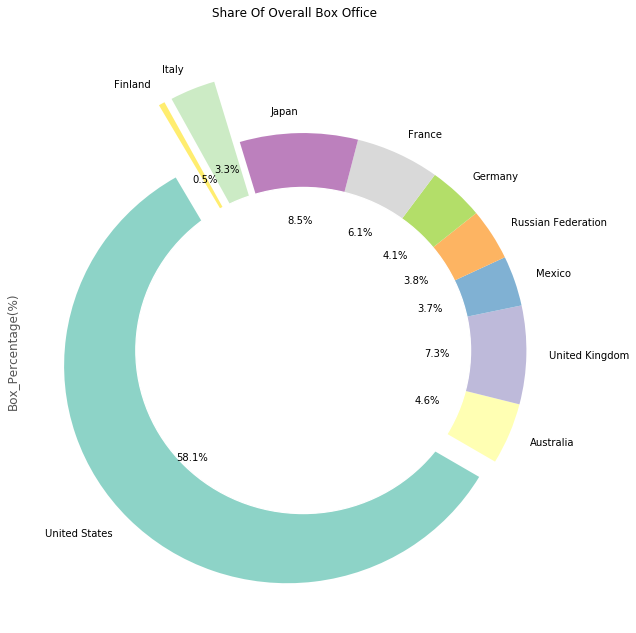

In [147]:
'''
Part II -- Run the code and explain the result
2.2 Datamining and visulization
2.2.3 Compare share among 10 countries
  *Make a pie chart to compare share of each country
    ◇USA take more than 50% of these 10 countries which shows that filmdom in USA is the more developed one.
    ◇Japan is a smaller country both in population and land area compared with Russia, but it has a higher box 
     office.
'''

pie_Percentage(2016)

In [165]:
'''
Part II -- Run the code and explain the result
2.2 Datamining and visulization
2.2.4 Compare with GDP
  *Make stacked area chart to compare box office to GDP among coutries
'''

#open the GDP file, select based on country list and year range and transform to a better datagrame
open('API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv','r').readlines()[:10]
gdp = pd.read_csv('API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv', skiprows=4, skipfooter=7, index_col=0, engine='python')
gdp = gdp[['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016']].dropna(axis = 0)
gdp_indexed = gdp.reindex(gdp.index.rename('country')).sort_index()

Countries_List = ['United States',
                  'Australia',
                  'United Kingdom', 
                  'Mexico',
                  'Russian Federation',
                  'Germany',
                  'France',
                  'Japan',
                  'Italy',
                  'Finland']
gdp_10_indexed = gdp_indexed.loc[Countries_List]
gdp_10_indexed

#create a better dataframe
gdp_10_indexed = gdp_10_indexed.stack()
gdp_10_indexed
gdp_10_indexed = gdp_10_indexed.to_frame('column')
gdp_10_indexed.reset_index(inplace=True) 
gdp_10_indexed.columns = ['Country','Year','GDP']
gdp_10_indexed['Year'] = gdp_10_indexed['Year'].astype(str).astype(int)
gdp_10_indexed.head()


Box_GDP = pd.merge(Box_office_ALL,gdp_10_indexed,left_index=True, right_index=True).drop(['Year_y','Country_y'],1)
Box_GDP['Box/GDP(%)'] = Box_GDP['Total_Gross']/Box_GDP['GDP']*100
Box_GDP.columns = ['Country','Year','Total_Gross','GDP','Box/GDP(%)']
Box_GDP = Box_GDP.round(2).drop(['Total_Gross','GDP'],1).set_index(['Country','Year'],inplace = False).sort_index()
Box_GDP.loc['Germany']

,Box/GDP(%)
Year,
2007,0.03
2008,0.03
2009,0.04
2010,0.03
2011,0.03
2012,0.04
2013,0.03
2014,0.03
2015,0.03


In [150]:
# Add original data
x = Box_GDP.loc['Germany'].index.values
Countries_List = ['United States',
                  'Australia',
                  'United Kingdom', 
                  'Mexico',
                  'Russian Federation',
                  'Germany',
                  'France',
                  'Japan',
                  'Italy',
                  'Finland']

def y(country):
    data = countries_top15_per_indexed.loc[country]
    y = data.values[:,0]
    return y

y_list = []
for country in Countries_List:
    y = Box_GDP.loc[country].values[:,0]
    y_list.append(y)

y_list



data = []
colors = ['rgb(184, 247, 212)',
          'rgb(247, 183, 183)',
          'rgb(255, 252, 99)',
          'rgb(197, 175, 255)',
          'rgb(175, 255, 236)',
          'rgb(255, 247, 175)',
          'rgb(140, 140, 170)',
          'rgb(164, 249, 179)',
          'rgb(247, 129, 123)',
          'rgb(123, 247, 213)']
for i in [0,1,2,3,4,5,6,7,8,9]:
    per = go.Scatter(
    x=x,
    y=sum(y_list[0:i+1]),
    mode='lines',
    line=dict(width=0.5,
              color= colors[i]),
    fill='tonexty',
    name = Countries_List[i]
)
    data.append(per)
    
layout = dict(
    title = 'Yearly Box Office Share of GDP From 2007 To 2016'+'<br />(Hover for value)',
    xaxis = dict(title ='Year'),
    yaxis = dict(title = 'Share Of DGP')
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename='Area Chart Of Overall Share')


In [ ]:
'''
Part II -- Run the code and explain the result
2.2 Datamining and visulization
2.2.4 Compare with GDP
  *Make stacked area chart to compare box office to GDP among coutries
    ◇The share of GDP of each country is relatively equal, that is to say there is no big difference with 
     each country.
    ◇Mexico, Australia, United States, Australia, Russian Federation and United Kingdom have a bigger share, around 6%.
    ◇Finland, Italy, Japan, Germany have a smaller share, around 3%.
    ◇From last chart we know that Japan has a higher box office than Russia, but the Japan GDP share is lower 
     than Russia. There are many possibilities, sucha as that Japanese have more colorful life and entertainment 
     spending is higher, that compared with Japan, Russian are more interested in movie rather than other 
     entertainments.
'''

In [166]:
'''
Part II -- Run the code and explain the result
2.2 Datamining and visulization
2.2.4 Compare with population
  *Make scatter plot to see per capital box office
'''

open('API_SP.POP.TOTL_DS2_en_csv_v2.csv','r').readlines()[:10]
pop = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2.csv', skiprows=4, skipfooter=7, index_col=0, engine='python')
pop = pop[['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016']].dropna(axis = 0)
pop_indexed = pop.reindex(pop.index.rename('country')).sort_index()

Countries_List = ['United States',
                  'Australia',
                  'United Kingdom', 
                  'Mexico',
                  'Russian Federation',
                  'Germany',
                  'France',
                  'Japan',
                  'Italy',
                  'Finland']
pop_10_indexed = pop_indexed.loc[Countries_List]
pop_10_indexed

#create a better dataframe
pop_10_indexed = pop_10_indexed.stack()
pop_10_indexed
pop_10_indexed = pop_10_indexed.to_frame('column')
pop_10_indexed.reset_index(inplace=True) 
pop_10_indexed.columns = ['Country','Year','POP']
pop_10_indexed['Year'] = pop_10_indexed['Year'].astype(str).astype(int)
pop_10_indexed['POP'] = pop_10_indexed['POP'].astype(int)
pop_10_indexed.head()


Box_Per = pd.merge(Box_office_ALL,pop_10_indexed,left_index=True, right_index=True).drop(['Year_y','Country_y'],1)
Box_Per['Per_Box'] = Box_Per['Total_Gross']/Box_Per['POP']
Box_Per.columns = ['Country','Year','Total_Gross','POP','Per_Box']
Box_Per = Box_Per.round(2).drop(['Total_Gross','POP'],1).set_index(['Year'],inplace = False).sort_index()
Box_Per
Box_Per.loc[2007]

,Country,Per_Box
Year,,
2007,United States,32.17
2007,Italy,15.05
2007,Japan,12.19
2007,France,20.49
2007,Germany,12.84
2007,Russian Federation,4.19
2007,Mexico,5.46
2007,United Kingdom,30.48
2007,Australia,34.80


In [167]:
#make dot plot to compare per capital box office among countries last three years
data = []
colors = ['rgb(252, 236, 118)',
          'rgb(255, 180, 180)',
          'rgb(2, 73, 252)']

for year in ['2014','2015','2016']:
    df = Box_Per.loc[int(year)]
    x = df.Per_Box
    y = Countries_List
    trace = go.Scatter(
        x = x,
        y = y,
        name = year,
        mode='markers',
        marker=dict(
            size= x,
            color = colors[int(year)-2017]
    )
    )
    data.append(trace)
layout = dict(
    title = 'Per Capital Box Office'+'<br />(Hover for value)',
    xaxis = dict(title ='Per Capital Box Office in Dollar'),
    yaxis = dict(title = 'Country')
)
fig = dict(data = data, layout = layout)
py.iplot(fig, filename = 'Per Capital Box Office')

In [ ]:
'''
Part II -- Run the code and explain the result
2.2 Datamining and visulization
2.2.4 Compare with population
  *Make scatter plot to see per capital box office
    ◇In 2014, there are 4 countries' per capital box office higher than 20 and in 2015, there are 3 and 4 in 2016.
     So we can not see obvious increasing trend over years from the chart.
    ◇France has an increasing trend these three years, which may show French invest more in entertainment these 
     years, however, on the contrary, Russia has an opposite trend.
'''